# Lifespan Estimation

## Models Tested

- Linear Regressor
- Random Forest Regressor
- Extreme Gradient Regressor (XGRegressor)
- Elastic Net Regression (Linear Regression with combined L1 and L2 regularizers)

## Loading Datasets

- Drug1: data of 24 worms (12 control, 12 drugged) 
- Drug2: data of 24 worms (12 control, 12 drugged) 
- Combined: data for 48 worms (24 control, 24 drugged)

In [1]:
import pandas as pd
import numpy as np
from lifespan_estimation_functions import *


In [2]:
csv = '../lifespan_merged_datasets/mergedworms_Drug1.csv'# Read the CSV file
data = pd.read_csv(csv)
np.random.seed(42)

csv2 = '../lifespan_merged_datasets/mergedworms_Drug2.csv'# Read the CSV file
data2 = pd.read_csv(csv2)
data2.loc[data2['drugged'] == 2, 'drugged'] = 1

csv3 = '../lifespan_merged_datasets/mergedworms_combined2.csv'# Read the CSV file
data3 = pd.read_csv(csv3)

random_state = 42

## Drug 1 Lifespan Estimation

linear 
Feature Importances (Linear Regression Coefficients):
distance_traveled_bin: 2.2745
total_distance_traveled: 1.3879
std/mean: 1.0542
std_speed: 0.7417
maximal_distance_traveled: 0.3198
time_elapsed_(hours): 0.3056




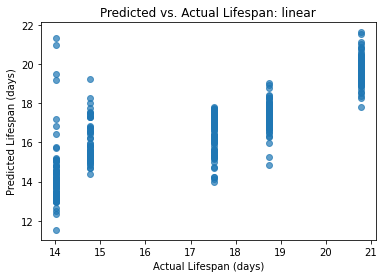

random_forest 
Feature Importances:
average_speed: 0.1912
average_change_in_pixels: 0.1790
std/mean: 0.1638
distance_traveled_bin: 0.1183
std_speed: 0.0756
average_angular_speed: 0.0655




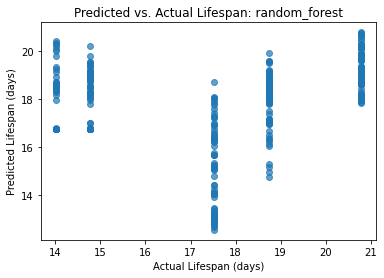

xgboost 
Feature Importances:
std/mean: 0.4073
average_speed: 0.1818
distance_traveled_bin: 0.0851
average_angular_speed: 0.0831
std_speed: 0.0588




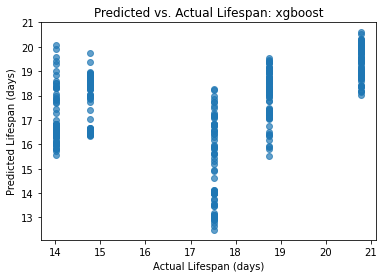

elasticnet 
Feature Importances (Linear Regression Coefficients):
std/mean: 1.6337
maximal_distance_traveled: 0.2148
time_elapsed_(hours): 0.0871




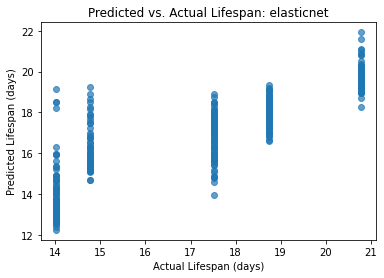

           model  mse_mean   mse_std   r2_mean    r2_std
0         linear  2.620935  1.172606  0.583793  0.108293
1  random_forest  4.176291  2.248942  0.335490  0.312077
2        xgboost  3.788749  1.905249  0.398540  0.251969
3     elasticnet  2.799075  1.425934  0.551910  0.165500


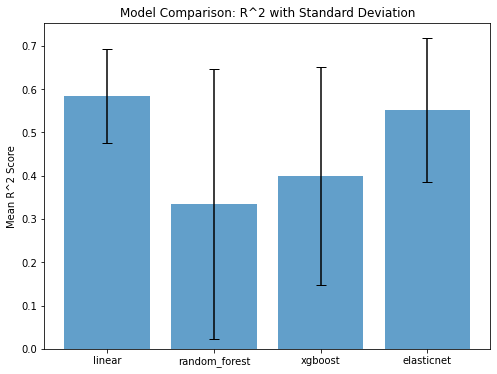

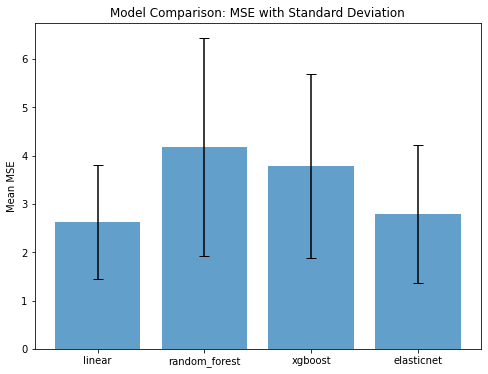

In [3]:
# Four models chosen for lifespan estimation
models = ["linear", "random_forest", "xgboost", "elasticnet"]

# Evaluate results and print predicted lifespan vs actual lifespan
results = evaluate_models(data, models)

# Plot results of all models
plot_results(pd.DataFrame(results))


Best Model **Linear Regressor**

### Saving the best model

In [4]:
import joblib
import os

model, results = return_model(data, model_select="linear", n_splits=5, random_state=random_state)

# Define the directory and file path
output_dir = "../models"
output_file = os.path.join(output_dir, "lifespan_prediction_Drug1.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Mean MSE : {results[0]}, Mean R^2: {results[2]}")
# Save the model
joblib.dump(model, '../models/lifespan_prediction_Drug1.pkl')
print("Model saved successfully!")

Mean MSE : 2.620934623235944, Mean R^2: 0.5837925372939204
Model saved successfully!


## Drug 2 Lifespan Estimation

linear 
Feature Importances (Linear Regression Coefficients):
distance_traveled_bin: 1.6707
std_speed: 0.4955
total_distance_traveled: 0.3178
maximal_distance_traveled: 0.2913
time_elapsed_(hours): 0.1902
average_distance_per_frame: 0.1524




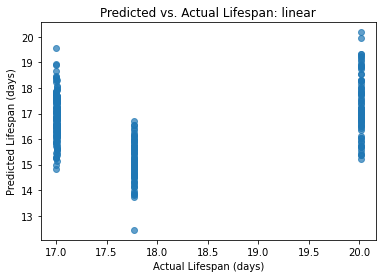

random_forest 
Feature Importances:
distance_traveled_bin: 0.1441
std_speed: 0.1230
maximal_distance_traveled: 0.1129
time_elapsed_(hours): 0.0934
average_speed: 0.0851
average_change_in_pixels: 0.0827
average_distance_per_frame: 0.0722
average_angular_speed: 0.0695
average_acceleration: 0.0606
total_distance_traveled: 0.0511




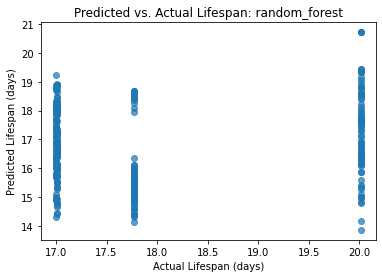

xgboost 
Feature Importances:
distance_traveled_bin: 0.1637
average_speed: 0.1008
std_speed: 0.0933
average_angular_speed: 0.0931
time_elapsed_(hours): 0.0915
average_acceleration: 0.0913
total_distance_traveled: 0.0883
std/mean: 0.0788
maximal_distance_traveled: 0.0765
average_distance_per_frame: 0.0641
id: 0.0586




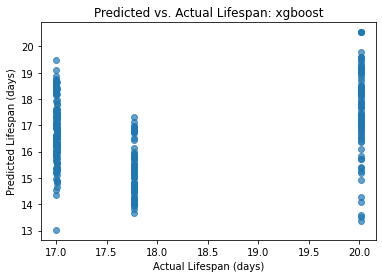

elasticnet 
Feature Importances (Linear Regression Coefficients):
maximal_distance_traveled: 0.1630
std_speed: 0.1132




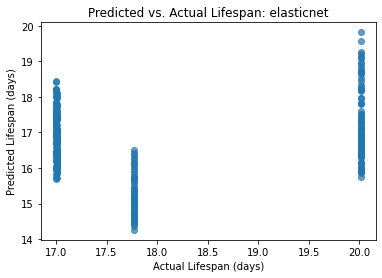

           model  mse_mean   mse_std   r2_mean    r2_std
0         linear  7.525861  2.059594 -0.518187  0.677508
1  random_forest  8.732201  2.439166 -0.777980  0.753979
2        xgboost  8.225300  2.043637 -0.690520  0.745694
3     elasticnet  7.247124  2.002033 -0.456860  0.649259


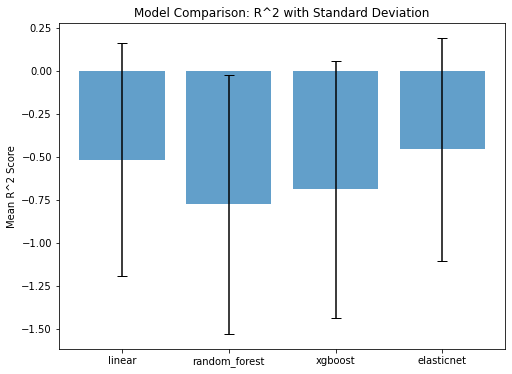

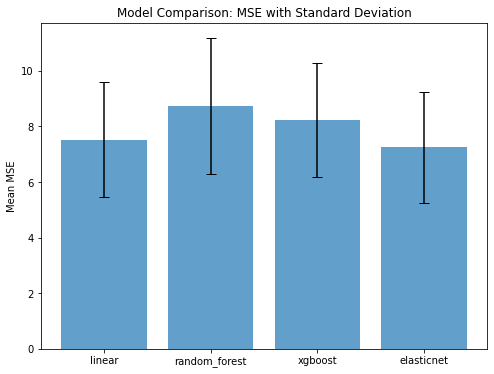

In [5]:
# Four models chosen for lifespan estimation
models = ["linear", "random_forest", "xgboost", "elasticnet"]

# Evaluate results and print predicted lifespan vs actual lifespan
results2 = evaluate_models(data2, models)

# Plot results of all models
plot_results(pd.DataFrame(results2))

Best Model **Linear Regressor** (although negative R^2 and high MSE, it is the best compared to other models)

### Saving the best model

In [6]:
import joblib
import os

model2, results2 = return_model(data2, model_select="linear", n_splits=5, random_state=random_state)

# Define the directory and file path
output_dir = "../models"
output_file = os.path.join(output_dir, "lifespan_prediction_Drug2.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Mean MSE : {results2[0]}, Mean R^2: {results2[2]}")
# Save the model
joblib.dump(model2, '../models/lifespan_prediction_Drug2.pkl')
print("Model saved successfully!")

Mean MSE : 7.525860918102362, Mean R^2: -0.5181870854009194
Model saved successfully!


## All Worms Combined (Both Drugs Included)

linear 
Feature Importances (Linear Regression Coefficients):
distance_traveled_bin: 0.6484
total_distance_traveled: 0.5640
std/mean: 0.3493
std_speed: 0.1893
time_elapsed_(hours): 0.1823
maximal_distance_traveled: 0.0661
average_acceleration: 0.0649




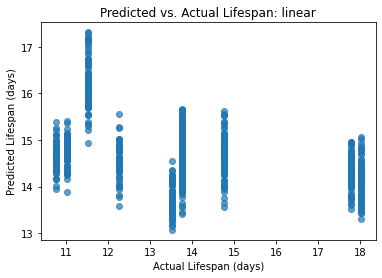

random_forest 
Feature Importances:
maximal_distance_traveled: 0.1292
average_change_in_pixels: 0.1163
average_speed: 0.1155
distance_traveled_bin: 0.1147
time_elapsed_(hours): 0.0824
std_speed: 0.0756
total_distance_traveled: 0.0682
average_distance_per_frame: 0.0654
average_acceleration: 0.0636
average_angular_speed: 0.0517




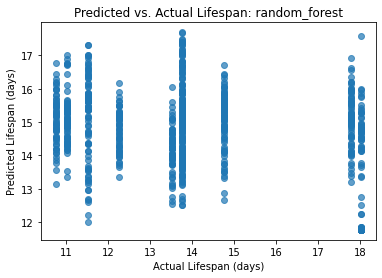

xgboost 
Feature Importances:
std/mean: 0.2305
roaming_fraction: 0.1024
distance_traveled_bin: 0.0942
average_speed: 0.0878
average_angular_speed: 0.0731
std_speed: 0.0716
maximal_distance_traveled: 0.0703
total_distance_traveled: 0.0680
average_acceleration: 0.0612
time_elapsed_(hours): 0.0528




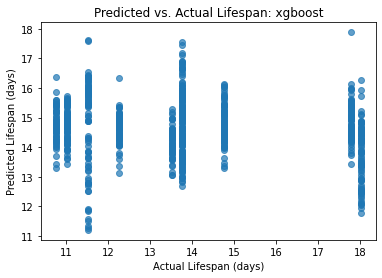

elasticnet 
Feature Importances (Linear Regression Coefficients):
std/mean: 0.5029
time_elapsed_(hours): 0.0596




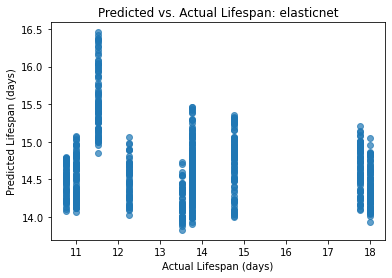

           model  mse_mean   mse_std   r2_mean    r2_std
0         linear  7.652693  1.922863 -0.299496  0.229909
1  random_forest  8.905571  1.755987 -0.525318  0.214795
2        xgboost  8.463862  1.586096 -0.453554  0.200627
3     elasticnet  7.070902  1.548822 -0.203726  0.165085


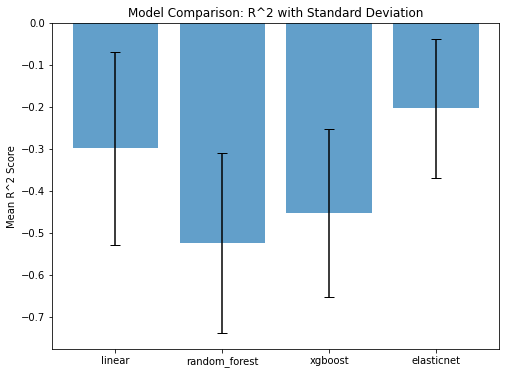

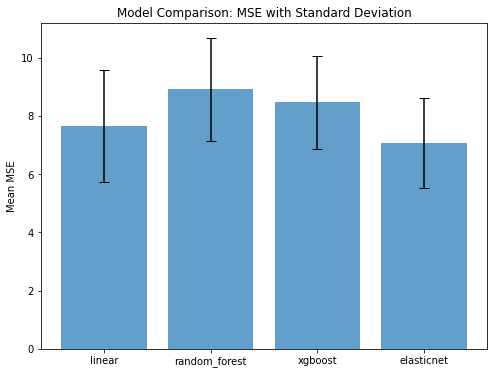

In [7]:
# Four models chosen for lifespan estimation
models = ["linear", "random_forest", "xgboost", "elasticnet"]

# Evaluate results and print predicted lifespan vs actual lifespan
results3 = evaluate_models(data3, models)

# Plot results of all models
plot_results(pd.DataFrame(results3))

Best Model **Elasticnet** (although negative R^2 and high MSE, it is the best compared to other models)

### Saving the best model

In [8]:
import joblib
import os

model3, results3 = return_model(data3, model_select="elasticnet", n_splits=5, random_state=random_state)

# Define the directory and file path
output_dir = "../models"
output_file = os.path.join(output_dir, "lifespan_prediction_all.pkl")

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Mean MSE : {results3[0]}, Mean R^2: {results3[2]}")
# Save the model
joblib.dump(model3, '../models/lifespan_prediction_all.pkl')
print("Model saved successfully!")

Mean MSE : 7.070902027460387, Mean R^2: -0.20372620600978708
Model saved successfully!
